In [19]:
import pandas as pd
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette="mako")
matplotlib.rcParams['figure.figsize'] = 12, 8

In [15]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2]:
import os
os.listdir()

['emo_ds.csv',
 'Process_dataset.ipynb',
 'EDA.ipynb',
 '.DS_Store',
 'distillber-base-cased',
 'emo_ds.txt',
 '.ipynb_checkpoints']

In [5]:
df = pd.read_csv('emo_ds.csv', index_col=0)
df.head()

,sentence,label,label_enc
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0


In [6]:
df.label.value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: label, dtype: int64

/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

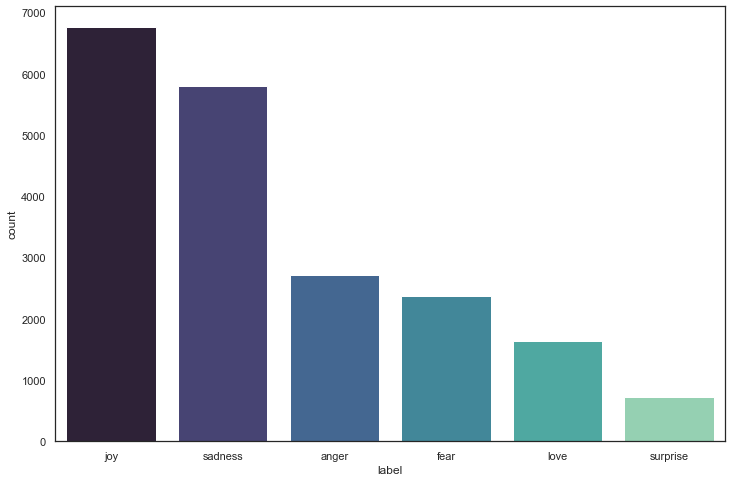

In [20]:
sns.countplot(df['label'], order = df['label'].value_counts().index)

## Sentence length and word count distribution

/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tweet Setence Length Distribution')

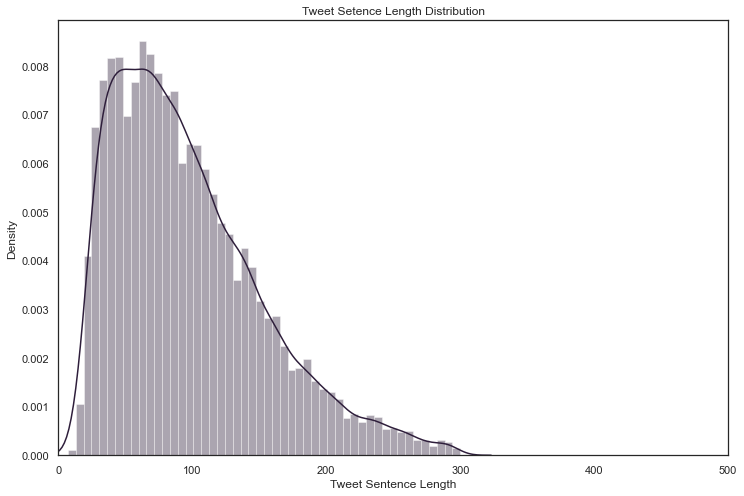

In [101]:
df['text_length'] = df['sentence'].astype(str).apply(len)
sns.distplot(df['text_length'])
plt.xlim([0, 500]);
plt.xlabel('Tweet Sentence Length');
plt.title("Tweet Setence Length Distribution");

/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


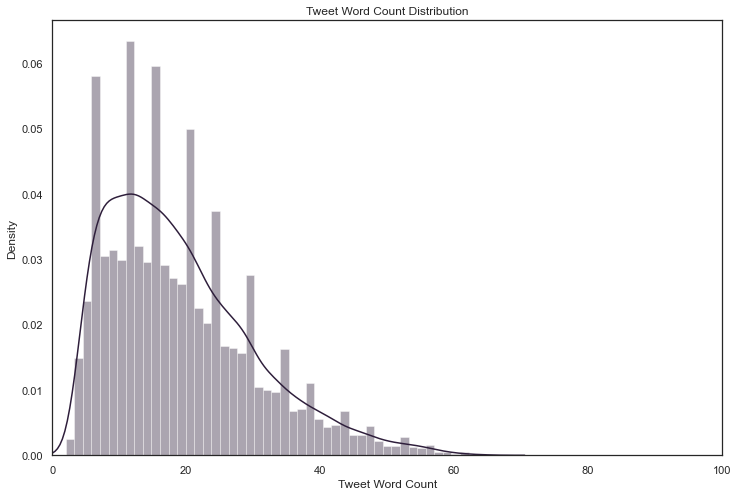

In [102]:
df['text_word_count'] = df['sentence'].apply(lambda x: len(str(x).split()))
sns.distplot(df['text_word_count'])
plt.xlim([0, 100]);
plt.xlabel('Tweet Word Count');
plt.title("Tweet Word Count Distribution");

## N-grams visualizations

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [58]:
label_unique = df.label.unique().tolist()
label_unique

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

,sentence,label,label_enc
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
5,ive been feeling a little burdened lately wasn...,sadness,4
10,i feel like i have to make the suffering i m s...,sadness,4
13,i feel low energy i m just thirsty,sadness,4
...,...,...,...
19975,i am feeling so helpless ma i am being unable ...,sadness,4
19979,i guess it s all about trying to internalize t...,sadness,4
19984,i have i feel pathetic for lying if i say no,sadness,4
19991,i cant help but feel sentimental about the fac...,sadness,4


In [93]:
# Stop words 
from sklearn.feature_extraction import text 
from collections import Counter
import collections 

# TODO 
# - past ngram..
# -pass variable 

def n_gram_worker(df, label_unique_list, ngram_type):
    # My own list of stopwords 
    my_additional_sw = [ 'and', 'to', 'the', 'feel', 'feeling', 'im', 'just', 'like', 'href',  
                        'http', 'www', 'know', 'really', 'ive', 'bit', 'little', 'img', 'src', 
                        'dont', 'want'] 
    stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_sw)
    
    # Visualization settings 
    fig, ax = plt.subplots(2, 3, figsize=(16, 20))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle(ngram_type)
    axis_x=0
    axis_y=0
    for label in label_unique_list:
        temp_df = df[df.label == label]
    
        # Vectorization 
        if ngram_type == 'Unigram':
            cv = CountVectorizer(stop_words=stop_words)
        elif ngram_type == 'Bigram':
            cv = CountVectorizer(stop_words=stop_words, ngram_range=(2, 2))
        elif ngram_type == 'Trigram':
            cv = CountVectorizer(stop_words=stop_words, ngram_range=(3, 3))
            
        bow = cv.fit_transform(temp_df.sentence)
        word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
        word_counter = collections.Counter(word_freq)
        word_counter_df = pd.DataFrame(word_counter.most_common(7), columns = ['word', 'freq'])
        
        
        bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="viridis", ax=ax[axis_x,axis_y])
        ax[axis_x,axis_y].set_title(label)
        ax[axis_x,axis_y].set_xticklabels(ax[axis_x,axis_y].get_xticklabels(), rotation=45, ha="right")
        
        #logic for axis [x.y]
        if axis_y == 2:
            axis_x+=1
            axis_y=0
        else:
            axis_y+=1
    plt.show();

/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/si

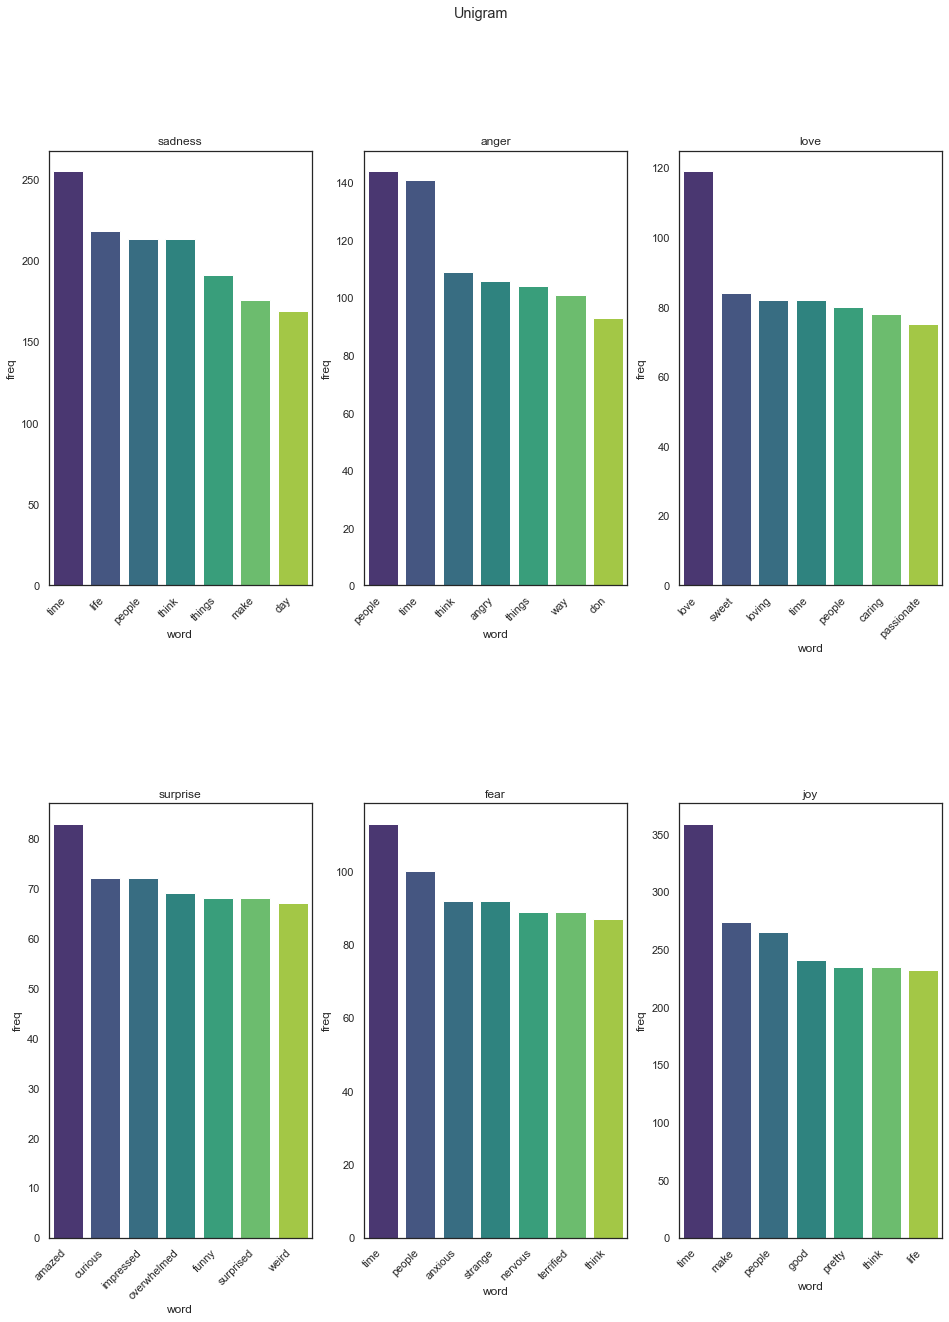

/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jiong/opt/miniconda3/envs/py38-nlp/lib/python3.8/si

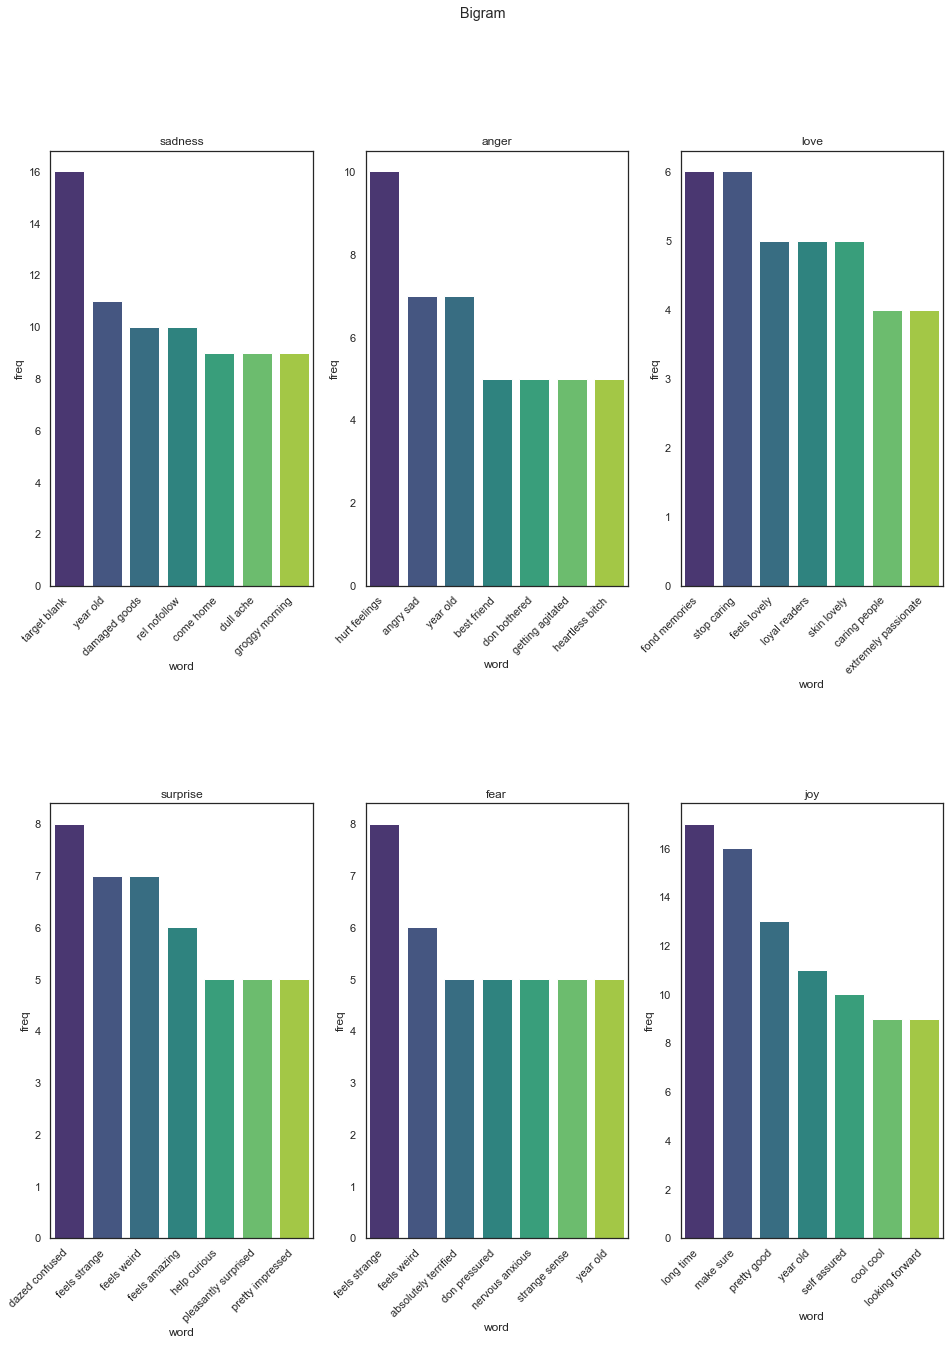

In [94]:
n_gram_worker(df, label_unique, 'Unigram' )
n_gram_worker(df, label_unique, 'Bigram' )